## Forecast Confidence Intervals

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load dataset
series = pd.read_csv('data/daily-total-female-births.csv', index_col=0, parse_dates=True)
series.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


#### Forecast Confidence Interval

In [38]:
# summarize the confidence interval on an ARIMA forecast
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import norm
# split into train and test sets
X = series['Births'].astype(float).values
size = len(X) - 1
train, test = X[:size], X[size:]
# fit an ARIMA model
model = ARIMA(train, order=(5, 1, 1))
model_fit = model.fit()
# forecast
forecast_result = model_fit.get_forecast()
# summarize forecast and confidence intervals
forecast = forecast_result.predicted_mean[0]
conf_int = forecast_result.conf_int()[0] # defaulted with alpha=0.05 --> 95% confidence interval

# Calculate standard error from confidence interval (assuming normal distribution)
# For a 95% confidence interval (alpha=0.05), z-score is approximately 1.96
alpha = 0.05 # significance level
z_score = norm.ppf(1 - alpha/2) # for a 95% confidence interval in normal distribution, z-score is 1.96
standard_error = (conf_int[1] - conf_int[0]) / (2 * z_score)


print(f'Expected: {test[0]:.3f}')
print(f'Forecast: {forecast:.3f}')
print(f'Standard Error (calculated): {standard_error:.3f}')
print(f'Confidence Interval: ({conf_int[0]:.3f}, {conf_int[1]:.3f})')

Expected: 50.000
Forecast: 45.149
Standard Error (calculated): 7.009
Confidence Interval: (31.413, 58.886)


For a normal distribution:
Confidence Interval = forecast ± 𝑧 ⋅ SE

Rearranging to solve for standard error:
SE = (Upper bound − Lower bound) / 2z

#### Interpreting the Confidence Interval

The 95% confidence interval suggests that there is a high likelihood that the real observation will be within the range. In the above example, the forecast was 45.149.
The 95% confidence interval suggested that the real observation was highly likely to fall within the range of values between 31.413 and 58.886. The real observation was 50.0 and was well within this range.

Further, the confidence interval is also limited by the assumptions made by the model, such as the distribution of errors made by the model fit a Gaussian distribution with a zero mean value (e.g. white noise).

In [56]:
# summarize multiple confidence intervals on an ARIMA forecast
# fit an ARIMA model
model = ARIMA(train, order=(5, 1, 1))
model_fit = model.fit()
# summarize confidence intervals
alphas = [0.2, 0.1, 0.05, 0.01]
for alpha in alphas:
  forecast_result = model_fit.get_forecast()
  conf_int = forecast_result.conf_int(alpha=alpha)
  print(f'{(1-alpha)*100}% Confidence Interval: {forecast_result.predicted_mean[0]:.3f} between {conf_int[0][0]:.3f} and {conf_int[0][1]:.3f}')

80.0% Confidence Interval: 45.149 between 36.167 and 54.131
90.0% Confidence Interval: 45.149 between 33.621 and 56.677
95.0% Confidence Interval: 45.149 between 31.413 and 58.886
99.0% Confidence Interval: 45.149 between 27.096 and 63.202


#### Plotting the Confidence Interval

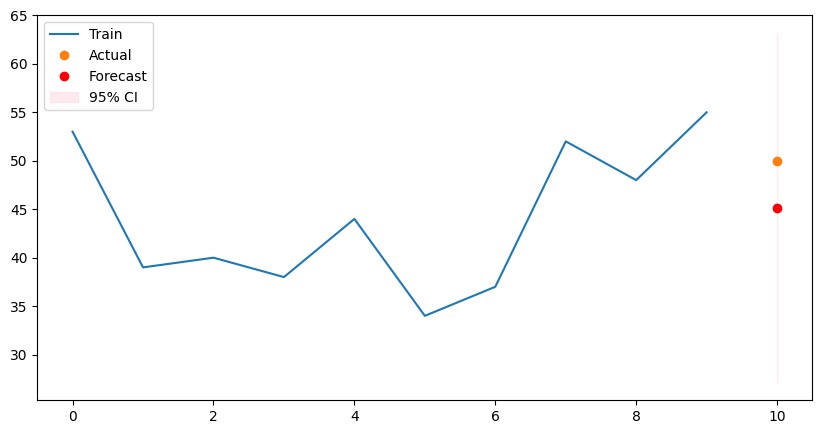

In [58]:
# plot
train_last = train[-10:]
plt.figure(figsize=(10,5))
plt.plot(range(len(train_last)), train_last, label='Train')
plt.plot(len(train_last), test[0], 'o', label='Actual')
plt.plot(len(train_last), forecast_result.predicted_mean[0], 'ro', label='Forecast')
plt.fill_between(
    [len(train_last)],
    conf_int[0][0],
    conf_int[0][1],
    color='pink', alpha=0.3, label='95% CI'
)
plt.legend()
plt.show()